# Drawdown Calculator

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read CSV File

                  SP500
Date                   
1871-01-01     4.440000
1871-02-01     4.500000
1871-03-01     4.610000
1871-04-01     4.740000
1871-05-01     4.860000
...                 ...
2023-05-01  4146.173182
2023-06-01  4345.372857
2023-07-01  4508.075500
2023-08-01  4457.358696
2023-09-01  4515.770000

[1833 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1833 entries, 1871-01-01 to 2023-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   1833 non-null   float64
dtypes: float64(1)
memory usage: 28.6 KB
None


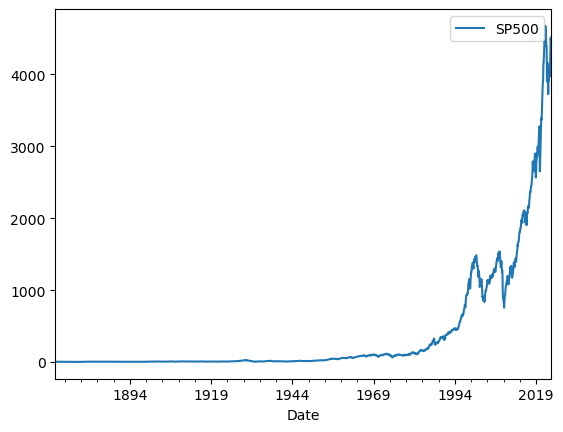

In [66]:
# Create a DataFrame and load a CSV
df = pd.read_csv("data.csv")

# Define column names in the CSV file
# Change these as per your CSV file
date = 'Date'
price = 'SP500'

# Select the required columns
df=df[[date,price]]

# Change type of date column to datetime
df[date] = pd.to_datetime(df[date], format='%Y-%m-%d', errors='coerce')

#set date column as index
df.set_index(date,inplace=True)

# set frequency
# df = df.to_period(freq='M')

#plot the time series
df.plot()

#view the time series
print(df)

#view the time series information
print(df.info())


## Calculate and Display Drawdowns


Top 10 Drawdowns:
        Start     Trough        End  Drawdown (%)  Duration (days)
23 1929-10-01 1932-06-01 1954-09-01    -84.760383             9101
83 2007-11-01 2009-03-01 2013-03-01    -50.824857             1947
1  1872-06-01 1877-06-01 1880-02-01    -47.297297             2801
81 2000-09-01 2003-02-01 2007-05-01    -43.651798             2433
49 1973-02-01 1974-12-01 1980-07-01    -43.353041             2707
5  1881-07-01 1896-08-01 1900-12-01    -42.097264             7092
12 1906-10-01 1907-11-01 1909-08-01    -37.686939             1035
14 1910-01-01 1921-08-01 1925-01-01    -37.378641             5479
8  1902-10-01 1903-10-01 1905-03-01    -29.265537              882
46 1969-01-01 1970-06-01 1972-03-01    -29.023474             1155

Drawdown Summary Statistics:
count    100.000000
mean      -8.209147
std       14.050041
min      -84.760383
25%       -7.312083
50%       -2.533555
75%       -0.786650
max       -0.024407
Name: Drawdown (%), dtype: float64

Duration Summary S

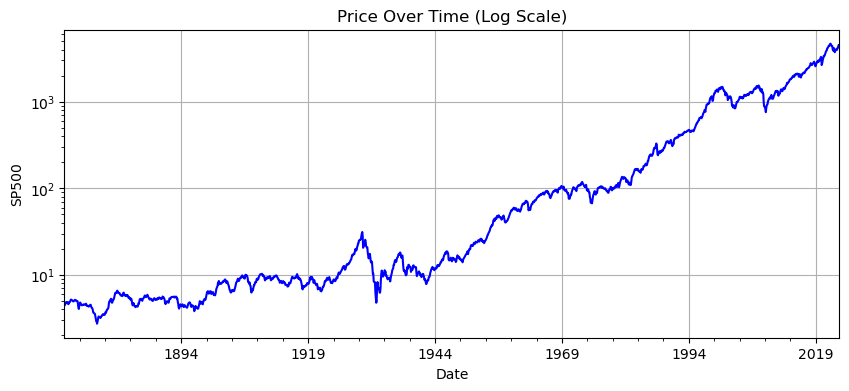

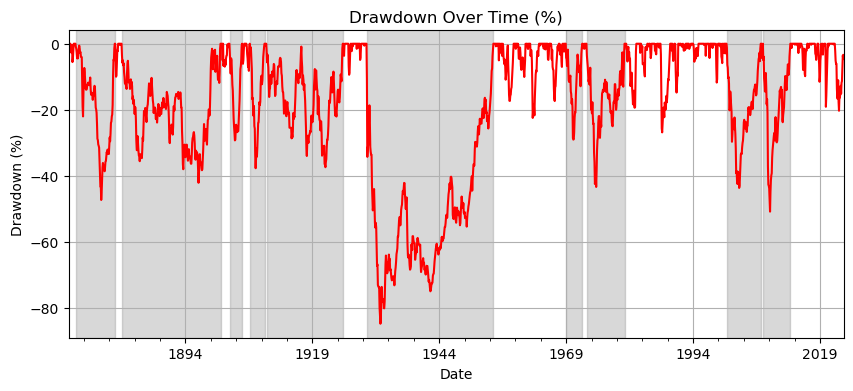

In [67]:
df['Peak'] = df[price].cummax()
df['Drawdown'] = (df[price] - df['Peak']) / df['Peak'] * 100  # Convert to percentage

# Identify drawdown periods
drawdown_periods = []
in_drawdown = False
start = None

for i in range(len(df)):
    if not in_drawdown and df['Drawdown'].iloc[i] < 0:
        in_drawdown = True
        start = df.index[i]
    elif in_drawdown and df['Drawdown'].iloc[i] == 0:
        end = df.index[i]
        trough_idx = df['Drawdown'][start:end].idxmin()
        drawdown = df['Drawdown'].loc[trough_idx]
        duration = (end - start).days
        drawdown_periods.append({
            'Start': start,
            'Trough': trough_idx,
            'End': end,
            'Drawdown (%)': drawdown,
            'Duration (days)': duration
        })
        in_drawdown = False

# Convert to DataFrame and get top 10
dd_df = pd.DataFrame(drawdown_periods)
top_10_dd = dd_df.sort_values(by='Drawdown (%)').head(10)

# Display results
print("\nTop 10 Drawdowns:")
print(top_10_dd[['Start', 'Trough', 'End', 'Drawdown (%)', 'Duration (days)']])

# Summary statistics
print("\nDrawdown Summary Statistics:")
print(dd_df['Drawdown (%)'].describe())

print("\nDuration Summary Statistics (days):")
print(dd_df['Duration (days)'].describe())

# Plot 1: Time Series (log scale)
plt.figure(figsize=(10, 4))
df[price].plot(title='Price Over Time (Log Scale)', color='blue', logy=True)
plt.ylabel(price)
plt.grid(True)
plt.show()

# Plot 2: Drawdown periods
plt.figure(figsize=(10, 4))
df['Drawdown'].plot(title='Drawdown Over Time (%)', color='red')
for _, row in top_10_dd.iterrows():
    plt.axvspan(row['Start'], row['End'], color='gray', alpha=0.3)
plt.ylabel('Drawdown (%)')
plt.grid(True)
plt.show()